In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

C:\Users\KIIT\AppData\Local\Temp\ipykernel_21852\1557228250.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv("50_Startups (1).csv")

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df = pd.get_dummies(df, columns=['State'], drop_first=True)

In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [8]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
State_Florida      0
State_New York     0
dtype: int64

In [9]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [10]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
feature_names = df.columns[:-1] 
scaled_data = pd.DataFrame(x_scaled, columns=feature_names)
scaled_data['Profit'] = y

In [13]:
scaled_data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida
0,2.016411,0.560753,2.153943,True,-0.685994
1,1.955860,1.082807,1.923600,False,-0.685994
2,1.754364,-0.728257,1.626528,False,1.457738
3,1.554784,-0.096365,1.422210,True,-0.685994
4,1.504937,-1.079919,1.281528,False,1.457738


Text(0.5, 1.0, 'Distribution of R&D Spend')

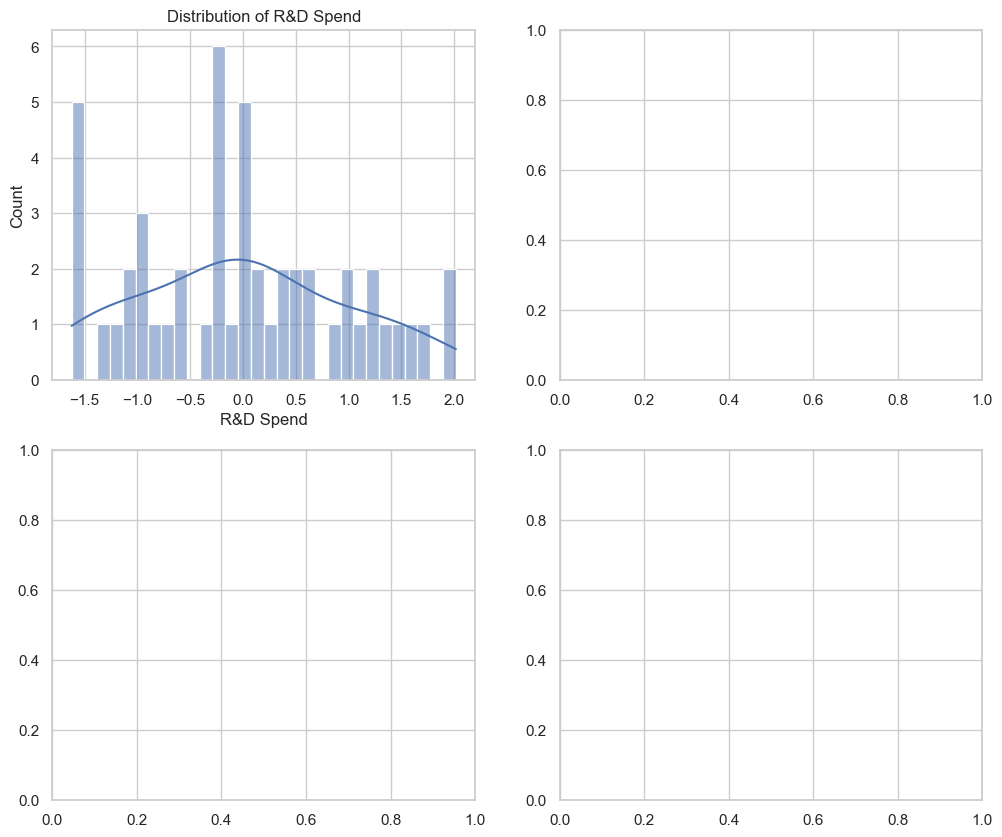

In [14]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(scaled_data['R&D Spend'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of R&D Spend')